In [2]:
import pandas as pd

# Define the file path
file_path = 'D:\smartphones.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256,Yellow,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128,Blue,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128,Blue,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128,Gray,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512,White,799.00


In [3]:
# Fill missing values
df['Final Price'] = df['Final Price'].fillna(df['Final Price'].mean())
df['Storage'] = df['Storage'].fillna(df['Storage'].mode()[0])
df['RAM'] = df['RAM'].fillna(df['RAM'].mode()[0])
df['Brand'] = df['Brand'].fillna(df['Brand'].mode()[0])

# Verify that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   49 non-null     object 
 1   Brand        49 non-null     object 
 2   Model        49 non-null     object 
 3   RAM          49 non-null     float64
 4   Storage      49 non-null     int64  
 5   Color        49 non-null     object 
 6   Final Price  49 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.8+ KB


In [4]:
# Descriptive statistics
df.describe()

,RAM,Storage,Final Price
count,49.000000,49.000000,49.000000
mean,6.122449,171.102041,374.453673
std,2.587089,113.240939,339.018517
min,2.000000,32.000000,106.000000
25%,4.000000,128.000000,181.600000
50%,6.000000,128.000000,262.580000
75%,8.000000,256.000000,391.990000
max,12.000000,512.000000,1599.000000


C:\Users\ZK\dataset\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


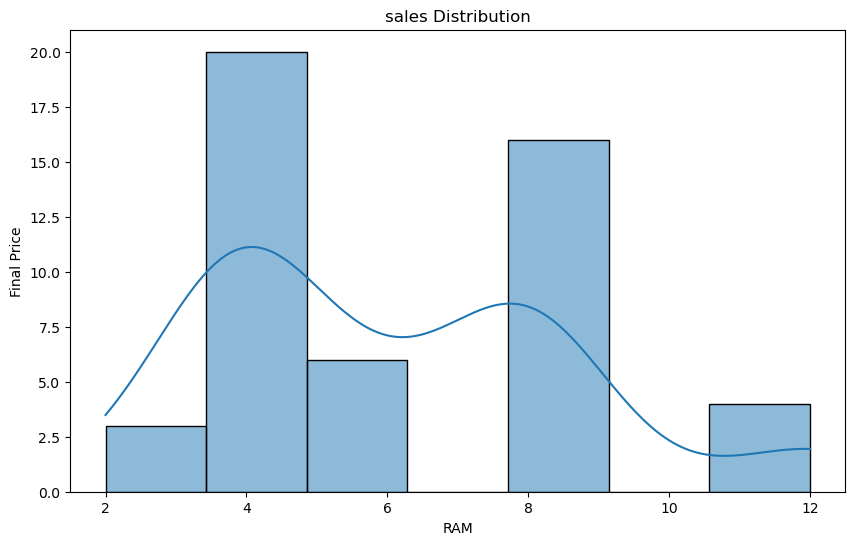

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['RAM'], kde=True)
plt.title('sales Distribution')
plt.xlabel('RAM')
plt.ylabel('Final Price')
plt.show()

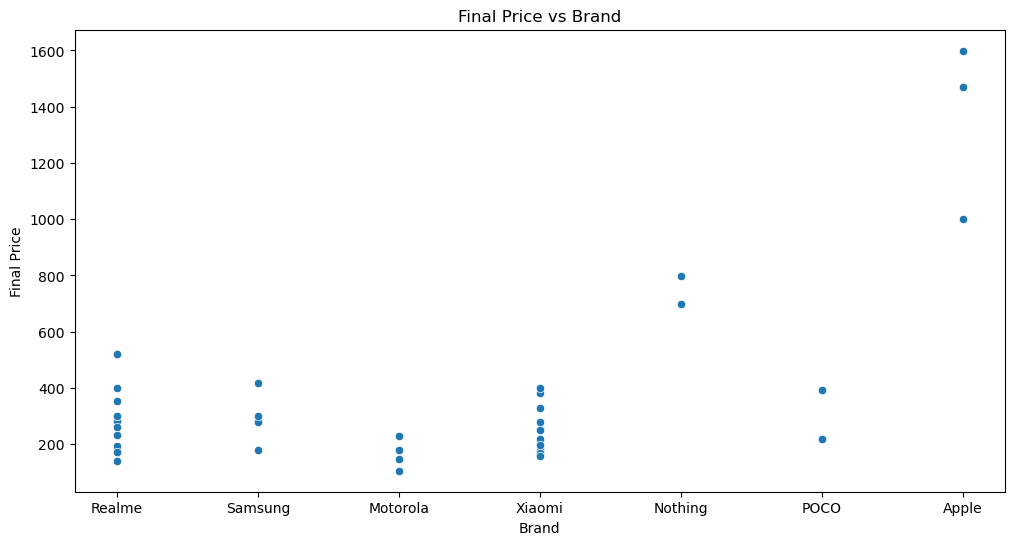

In [8]:
# Scatter plot of sales vs product_name
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Brand', y='Final Price')
plt.title('Final Price vs Brand')
plt.xlabel('Brand')
plt.ylabel('Final Price')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target
X = df[['Brand', 'Storage', 'Final Price']]  # independent variables
y = df['RAM']  # dependent variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compare predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

    Actual  Predicted
29     8.0   5.551200
4     12.0  16.743295
26     2.0   3.877222
30     6.0   5.406891
32    12.0  12.796021


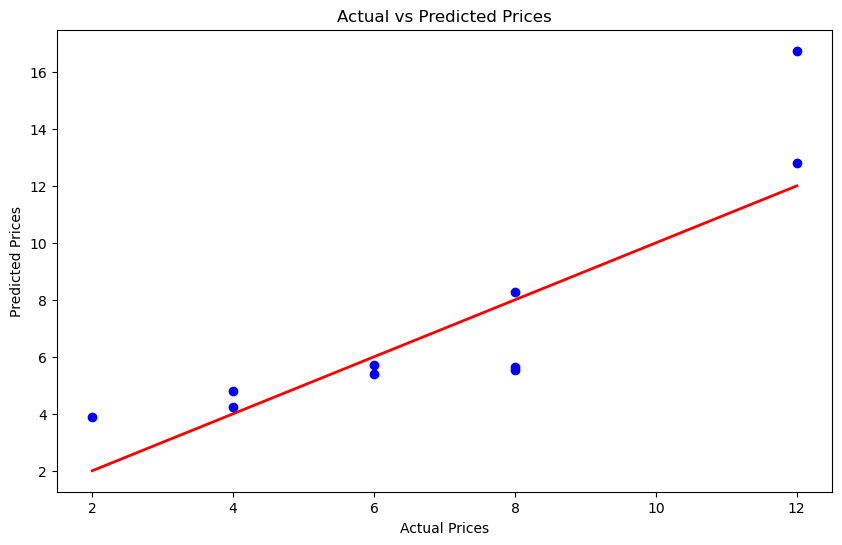

In [12]:
# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()